##### ODE - 1

In [1]:
import autograd.numpy as np
import autograd
from autograd import grad
import autograd.numpy.random as npr
from autograd.core import primitive
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nx = 10
dx = 1. / nx

In [3]:
def A(x):
    # LHS
    return x + (1. + 3. * x ** 2) / (1. + x + x ** 3)


def B(x):
    # RHS
    return x ** 3 + 2. * x + x ** 2 * ((1. + 3 * x ** 2) / (1. + x + x ** 3))


def f(x, psy):
    # d(psy) / dx = f(x, psy)
    return B(x) - psy * A(x)


def psy_analytic(x):
    # Analytic solution to problem
    return (np.exp((-x ** 2) / 2.)) / (1. + x + x ** 3) + x ** 2

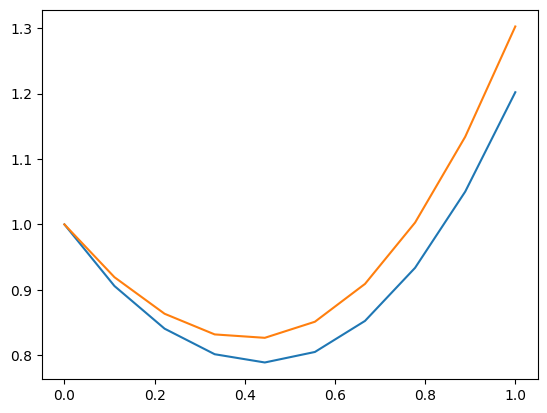

In [4]:
 x_space = np.linspace(0, 1, nx)
 y_space = psy_analytic(x_space)
 psy_f = np.zeros_like(y_space)
 psy_f[0] = 1
 
 for i in range(1, len(x_space)):
    psy_f[i] = psy_f[i - 1] + B(x_space[i]) * dx - psy_f[i - 1] * A(x_space[i]) * dx
    
plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, psy_f)
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_net(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def ddx_neural_net(W, x, k = 1):
    return np.dot(np.dot(W[1].T, W[0].T ** k), sigmoid_grad(x))


def loss_func(W, x):
    loss_sum = 0
    for xi in x:
        nn_out = neural_net(W, xi)[0][0]
        psy_t = 1 + xi * nn_out
        dnn_out = ddx_neural_net(W, xi)[0][0]
        d_psy_t = nn_out + xi * dnn_out
        func = f(xi, psy_t)
        sqr_err = (d_psy_t - func) ** 2
        
        loss_sum += sqr_err
    return loss_sum

In [6]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(1000):
    loss_grad = grad(loss_func)(W, x_space)
    
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.1463569478368373
[array([[ 0.59648467,  0.74733498, -1.50973521,  0.92981263,  0.37195678,
        -0.30041631, -0.07279175,  0.4628698 , -1.30927795,  0.49988771]]), array([[ 1.30743637],
       [-0.21617225],
       [-1.73099748],
       [ 0.80172929],
       [ 1.23119741],
       [-1.20999879],
       [-0.19039997],
       [ 0.08267579],
       [-1.20402551],
       [-1.10610074]])]


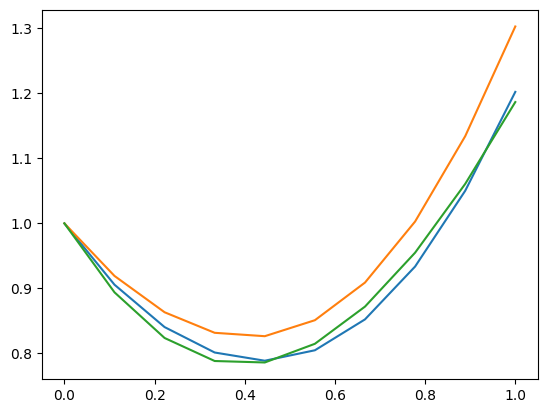

In [7]:
print(loss_func(W, x_space))
res = [1 + xi * neural_net(W, xi)[0][0] for xi in x_space]

print(W)

plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, psy_f)
plt.plot(x_space, res)
plt.show()

##### ODE - 2

In [8]:
nx = 10
dx = 1. / nx

In [9]:
def f(x, psy, dpsy):
    # RHS
    return -1. / 5. * np.exp(-x / 5.) * np.cos(x) - 1. / 5. * dpsy - psy


def psy_analytic(x):
    # Analytic solution
    return np.exp(-x / 5.) * np.sin(x)

In [10]:
x_space = np.linspace(0, 2, nx)
y_space = psy_analytic(x_space)

In [11]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def neural_net(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_net_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def psy_trial(xi, net_out):
    return xi + xi ** 2 * net_out


psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)


def loss_func(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_net(W, xi)[0][0]
        
        net_out_d = grad(neural_net_x)(xi)
        net_out_dd = grad(grad(neural_net_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
    
        trial_gradient = psy_grad(xi, net_out)
        trial_gradient_2 = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, trial_gradient)
        
        sqr_err = (trial_gradient_2 - func) ** 2
        loss_sum += sqr_err
        
    return loss_sum

In [12]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad = grad(loss_func)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

2.6029186200820487


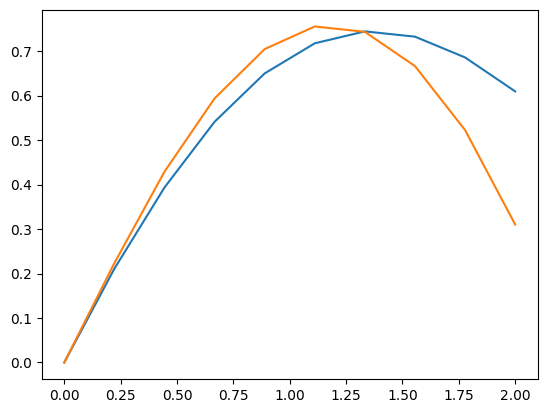

In [13]:
print(loss_func(W, x_space))

result = [psy_trial(xi, neural_net(W, xi)[0][0]) for xi in x_space]

plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, result)
plt.show()